/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



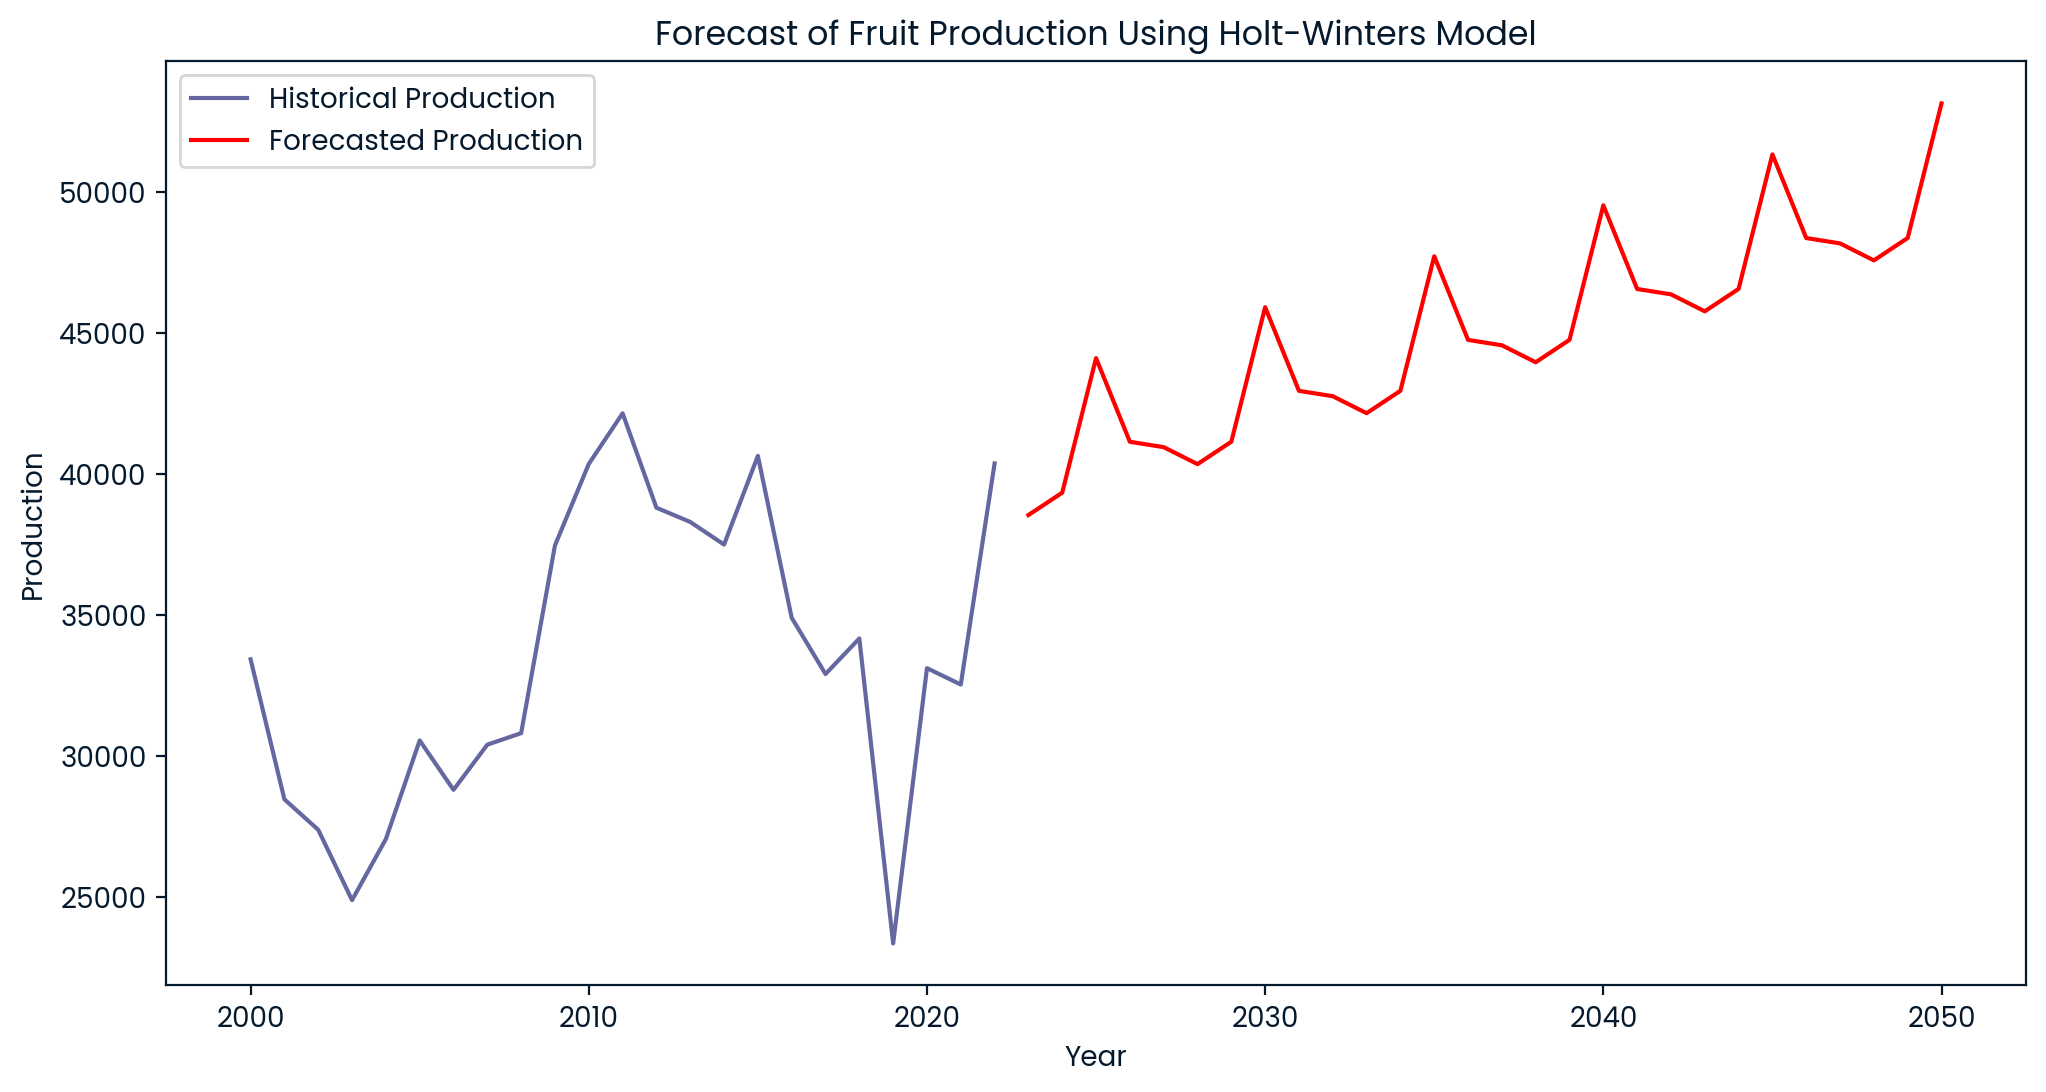

    Year  Forecasted Production
23  2023           38543.985888
24  2024           39338.775251
25  2025           44107.170884
26  2026           41141.581837
27  2027           40951.603519
28  2028           40349.433643
29  2029           41144.223006
30  2030           45912.618639
31  2031           42947.029592
32  2032           42757.051274
33  2033           42154.881398
34  2034           42949.670761
35  2035           47718.066394
36  2036           44752.477348
37  2037           44562.499029
38  2038           43960.329153
39  2039           44755.118516
40  2040           49523.514149
41  2041           46557.925103
42  2042           46367.946785
43  2043           45765.776908
44  2044           46560.566271
45  2045           51328.961904
46  2046           48363.372858
47  2047           48173.394540
48  2048           47571.224663
49  2049           48366.014027
50  2050           53134.409659
Model parameters: {'smoothing_level': 0.8590254500092338, 'smoothing_tre

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
data = pd.read_csv('NutsData.csv')

# Convert the 'Year' column to datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data = data.sort_values('Year').set_index('Year')

# Interpolate to handle any missing values
data['Production'] = data['Production'].interpolate()

# Define the seasonal periods if known, here we assume an example value, adjust as necessary
seasonal_periods = 5

# Initialize and fit the Holt-Winters model
model = ExponentialSmoothing(data['Production'], trend='add', seasonal='add', seasonal_periods=seasonal_periods)
fit = model.fit()

# Forecast future values - let's forecast up to the year 2050
forecast_years = len(pd.date_range(start=data.index.max(), end='2050', freq='A'))
forecast = fit.forecast(forecast_years)

# Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=data.index.max() + pd.DateOffset(years=1), periods=forecast_years, freq='A')
forecast_df = pd.DataFrame(forecast.values, index=forecast_index, columns=['Forecasted Production'])

# Combine historical and forecasted data for display
combined_df = pd.concat([data, forecast_df], axis=0)

# Ensure that the index is continuous and reset index to add 'Year' column for clarity
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Year'}, inplace=True)
combined_df['Year'] = combined_df['Year'].dt.year  # Extract just the year for display

# Plotting the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Year'], combined_df['Production'], label='Historical Production')
plt.plot(combined_df['Year'], combined_df['Forecasted Production'], label='Forecasted Production', color='red')
plt.title('Forecast of Fruit Production Using Holt-Winters Model')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()

# Display the combined data as a table, showing non-NaN forecasted production values
print(combined_df[['Year', 'Forecasted Production']].dropna())

# Display model fit parameters
print("Model parameters:", fit.params)


Year  Forecasted Production
23  2023           41916.687634
24  2024           41538.217015
25  2025           44632.845036
26  2026           45648.923836
27  2027           47908.080880
28  2028           47529.610261
29  2029           50624.238282
30  2030           51640.317082
31  2031           53899.474127
32  2032           53521.003508
33  2033           56615.631529
34  2034           57631.710328
35  2035           59890.867373
36  2036           59512.396754
37  2037           62607.024775
38  2038           63623.103574
39  2039           65882.260619
40  2040           65503.790000
41  2041           68598.418021
42  2042           69614.496820
43  2043           71873.653865
44  2044           71495.183246
45  2045           74589.811267
46  2046           75605.890066
47  2047           77865.047111
48  2048           77486.576492
49  2049           80581.204513
50  2050           81597.283313

In [2]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
data = pd.read_csv('NutsData.csv')

# Convert the 'Year' column to datetime format and sort the data
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data = data.sort_values('Year').set_index('Year')

# Interpolate to handle any missing values
data['Production'] = data['Production'].interpolate()

# Define the seasonal periods if known, here we assume an example value, adjust as necessary
seasonal_periods = 4

# Initialize and fit the Holt-Winters model
model = ExponentialSmoothing(data['Production'], trend='add', seasonal='add', seasonal_periods=seasonal_periods)
fit = model.fit()

# Forecast future values up to the year 2050
forecast_years = len(pd.date_range(start=data.index.max(), end='2050', freq='A'))
forecast = fit.forecast(forecast_years)

# Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=data.index.max() + pd.DateOffset(years=1), periods=forecast_years, freq='A')
forecast_df = pd.DataFrame(forecast.values, index=forecast_index.year, columns=['Forecasted Production'])

# Print only the forecasted production values
print(forecast_df['Forecasted Production'].to_string(index=False))


40627.861966
41141.557855
43638.155656
44764.196801
46618.980629
47132.676518
49629.274320
50755.315465
52610.099292
53123.795182
55620.392983
56746.434128
58601.217956
59114.913845
61611.511646
62737.552791
64592.336619
65106.032508
67602.630309
68728.671454
70583.455282
71097.151171
73593.748972
74719.790117
76574.573945
77088.269834
79584.867635
80710.908780


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

